## Читаю и рисую траекторию

In [20]:
import os

Icms_path = os.path.abspath("data\\traj.dat")
file = open(Icms_path)

header = file.readline().split()
print(header)
lines = file.readlines()

table = [line.split() for line in lines]
table = list(filter(None, table))

R = [float(row[0]) for row in table]
Z = [float(row[1]) for row in table]
N_traj = [int(row[12]) for row in table]

rays = {}
index = 0
ray = []
for row in table:
    if index != int(row[12]):
         index = int(row[12])
         ray = { 'R' : [], 'Z' : []}
         rays[index] = ray
        # print(index)
    ray['R'].append(float(row[0]))
    ray['Z'].append(float(row[1]))
    #print("append")


#print(rays)

['R', 'Z', 'rho', 'theta', 'N_par', 'N_perp', 'P_tot', 'P_land', 'P_coll', 'P_alph', 'slow=1', 'out=1', 'N_traj']


In [21]:
import matplotlib
import matplotlib.pyplot as plt

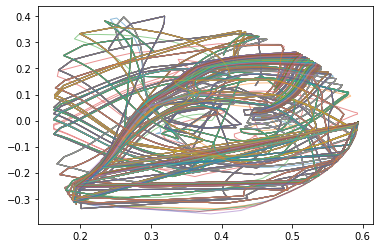

In [22]:

for (n, ray) in rays.items() :
    plt.plot(ray['R'], ray['Z'], alpha=0.5, linewidth=1);


In [27]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def plot_func(index, k):
    for i in range(k):
        ray = rays.get(index + i)
        if (ray != None):
            plt.plot(ray['R'], ray['Z'], alpha=1.0, linewidth=1)
    plt.xlim(0.15, 0.65)
    plt.ylim(-0.5, 0.5)
    plt.show()
 
w = interactive(plot_func, index = (1, 1000), k = (1,100))
w

interactive(children=(IntSlider(value=500, description='index', max=1000, min=1), IntSlider(value=50, descript…